In [206]:
import matplotlib
import random
from pathlib import Path
from nexa_sentimotion_filename_parser.metadata import Metadata
from nexa_py_sentimotion_mapper.sentimotion_mapper import Mapper

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [207]:
df = pd.read_csv("data/accuracy_by_filename.csv")
df

,filename,emotion,emotion_id,intensity_level,mode,coverage,n_correct_answers,accuracy,p_value_greater
0,A102_adm_p_2,admiration,5,2,p,4,0,0.000000,1.000000
1,A102_adm_p_3,admiration,5,3,p,7,3,0.428571,0.019868
2,A102_adm_v_2,admiration,5,2,v,11,0,0.000000,1.000000
3,A102_adm_v_3,admiration,5,3,v,9,2,0.222222,0.194215
4,A102_amu_p_2,amusement,13,2,p,4,0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
4977,A91_ten_v_3,tenderness,28,3,v,8,4,0.500000,0.003540
4978,A91_tri_p_2,triumph_achievement,20,2,p,10,2,0.200000,0.228913
4979,A91_tri_p_3,triumph_achievement,20,3,p,8,2,0.250000,0.160287
4980,A91_tri_v_2,triumph_achievement,20,2,v,8,0,0.000000,1.000000


In [208]:
df_peaks = pd.read_csv("data/rms_peak_levels.csv")
df_peaks['Filename'] = df_peaks['Filename'].apply(lambda x: Path(x).stem)
df_peaks

,Filename,Peak_dB
0,A200_anx_v_2,-56.945319
1,A220_bor_v_3,-56.104803
2,A438_reg_v_3,-61.364807
3,A405_ple_v_3,-50.884950
4,A102_tri_v_2,-58.408883
...,...,...
4977,A438_conf_p_3,-61.404154
4978,A323_conf_p_2,-48.252932
4979,A91_pea_p_2,-53.811800
4980,A207_reg_v_3,-53.688146


In [209]:
df.rename(columns={'filename': 'Filename'}, inplace=True)

# Now you can proceed with the merge operation as before
df_merged = pd.merge(df, df_peaks, on='Filename', how='left')

df_merged

,Filename,emotion,emotion_id,intensity_level,mode,coverage,n_correct_answers,accuracy,p_value_greater,Peak_dB
0,A102_adm_p_2,admiration,5,2,p,4,0,0.000000,1.000000,-54.699914
1,A102_adm_p_3,admiration,5,3,p,7,3,0.428571,0.019868,-51.809602
2,A102_adm_v_2,admiration,5,2,v,11,0,0.000000,1.000000,-57.941374
3,A102_adm_v_3,admiration,5,3,v,9,2,0.222222,0.194215,-55.938600
4,A102_amu_p_2,amusement,13,2,p,4,0,0.000000,1.000000,-46.979929
...,...,...,...,...,...,...,...,...,...,...
4977,A91_ten_v_3,tenderness,28,3,v,8,4,0.500000,0.003540,-56.290500
4978,A91_tri_p_2,triumph_achievement,20,2,p,10,2,0.200000,0.228913,-49.259944
4979,A91_tri_p_3,triumph_achievement,20,3,p,8,2,0.250000,0.160287,-43.435523
4980,A91_tri_v_2,triumph_achievement,20,2,v,8,0,0.000000,1.000000,-51.985781


In [210]:
df_merged.describe()

,emotion_id,intensity_level,coverage,n_correct_answers,accuracy,p_value_greater,Peak_dB
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4.982000e+03,4982.000000
mean,21.522882,2.431353,7.286230,2.654757,0.368296,2.760679e-01,-54.644023
std,12.558499,0.579032,1.611158,2.054379,0.274638,3.571846e-01,11.636983
min,0.000000,1.000000,1.000000,0.000000,0.000000,3.855433e-11,-200.000000
25%,11.000000,2.000000,6.000000,1.000000,0.142857,1.907460e-03,-61.362250
50%,22.000000,2.000000,7.000000,2.000000,0.333333,7.119117e-02,-53.943536
75%,32.000000,3.000000,8.000000,4.000000,0.571429,4.868419e-01,-47.404735
max,43.000000,3.000000,15.000000,11.000000,1.000000,1.000000e+00,-18.023479


In [211]:
# Check if there are any null values in the 'Peak_DB' column
null_peak_db = df_merged['Peak_dB'].isnull().any()

if null_peak_db:
    print("There are null values in the 'Peak_DB' column.")
else:
    print("There are no null values in the 'Peak_DB' column.")

There are no null values in the 'Peak_DB' column.


In [212]:
filtered_merged_df = df_merged[df_merged['Peak_dB'] >= -100]
filtered_merged_df = filtered_merged_df[filtered_merged_df['coverage'] >= 4]

# Full dataset analysis

### Correlation analysis

<Axes: xlabel='Peak_dB', ylabel='accuracy'>

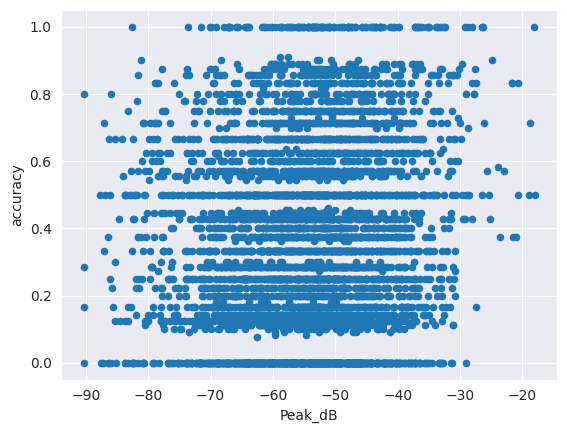

In [213]:
filtered_merged_df.plot.scatter(x='Peak_dB', y='accuracy')

In [214]:
from scipy.stats import pearsonr

# Extract the 'Accuracy' and 'Peak_dB' columns
accuracy = filtered_merged_df['accuracy']
peak_db = filtered_merged_df['Peak_dB']

# Calculate Pearson's correlation coefficient and the p-value
corr_coefficient, p_value = pearsonr(accuracy, peak_db)

print(f"Pearson's correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Pearson's correlation coefficient: 0.11725498381905627
P-value: 1.549260427450445e-16


### Peak level segment analysis

Arbitrary thresholds for peak levels

In [215]:
# Define thresholds for segmenting the data (these are just examples, adjust based on your data)
thresholds = [-100, -80, -60, -40, -20, 0]  # dB levels
segment_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'Segment' based on 'Peak_dB' using pd.cut()
filtered_merged_df['Segment'] = pd.cut(filtered_merged_df['Peak_dB'], bins=thresholds, labels=segment_labels, include_lowest=True)

# Group by 'Segment' and calculate mean accuracy within each segment
segment_accuracy = filtered_merged_df.groupby('Segment')['accuracy'].mean()

print(segment_accuracy)

Segment
Very Low     0.342569
Low          0.331597
Medium       0.369441
High         0.459390
Very High    0.678571
Name: accuracy, dtype: float64


/tmp/ipykernel_556838/2844497160.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_accuracy = filtered_merged_df.groupby('Segment')['accuracy'].mean()


Peak level percentile thresholds

In [216]:
# Calculate percentile values for 'Peak_dB'
percentiles = [5, 10, 25, 50, 75, 90, 95]
percentile_thresholds = np.percentile(filtered_merged_df['Peak_dB'], percentiles)

# Define segment labels based on percentiles
segment_labels = ['5th Percentile or Below',  '5th-10th Percentile', '10th-25th Percentile', '25th-50th Percentile', '50th-75th Percentile', '75th-90th Percentile', '90th-95th Percentile', 'Above 95th Percentile']

# Segment 'Peak_dB' into percentile-based categories
filtered_merged_df['Segment'] = pd.cut(filtered_merged_df['Peak_dB'], bins=[-np.inf] + percentile_thresholds.tolist() + [np.inf], labels=segment_labels)

# Calculate mean 'Accuracy' within each segment
segment_accuracy = filtered_merged_df.groupby('Segment')['accuracy'].mean()

print(segment_accuracy)

Segment
5th Percentile or Below    0.358745
5th-10th Percentile        0.313181
10th-25th Percentile       0.325313
25th-50th Percentile       0.352716
50th-75th Percentile       0.370773
75th-90th Percentile       0.385639
90th-95th Percentile       0.409696
Above 95th Percentile      0.500631
Name: accuracy, dtype: float64


/tmp/ipykernel_556838/3510614503.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_accuracy = filtered_merged_df.groupby('Segment')['accuracy'].mean()


### Emotion distribution among peak level percentiles

/tmp/ipykernel_556838/3310150401.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emotion_distribution_per_segment = filtered_merged_df.groupby('Segment')['emotion_id'].value_counts().unstack(fill_value=0)


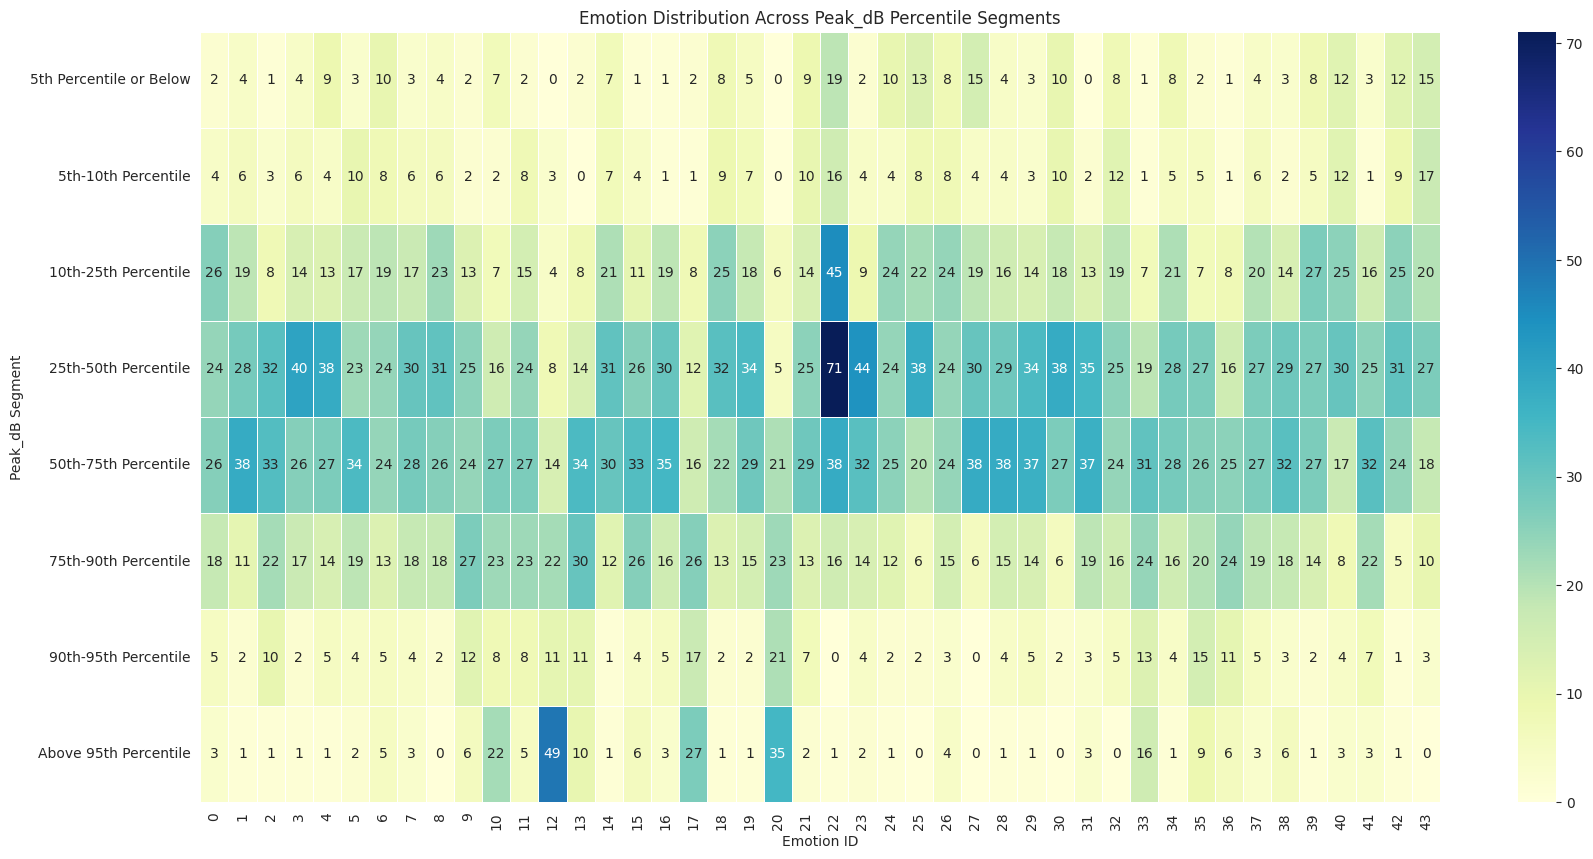

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt


# Group the DataFrame by 'Segment' and then count 'emotion_id' occurrences within each segment
emotion_distribution_per_segment = filtered_merged_df.groupby('Segment')['emotion_id'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.heatmap(emotion_distribution_per_segment, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

plt.title('Emotion Distribution Across Peak_dB Percentile Segments')
plt.xlabel('Emotion ID')
plt.ylabel('Peak_dB Segment')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


In [218]:
ret = Mapper.get_emotion_from_id(27)
print(ret)

concentration


In [219]:
ret = Mapper.get_emotion_from_id(12)
print(ret)

anger


In [220]:
ret = Mapper.get_emotion_from_id(20)
print(ret)

triumph_achievement


In [228]:
ret = Mapper.get_emotion_from_id(33)
print(ret)

happiness_joy


## Emotion Analysis

Correlation between accuracy and sound levels for emotions

In [222]:
from scipy.stats import pearsonr

# Get unique emotion_ids
unique_emotions = filtered_merged_df['emotion_id'].unique()

# Initialize a dictionary to store results
correlation_results = {}

# Loop through each unique emotion_id to perform correlation analysis
for emotion in unique_emotions:
    # Filter the DataFrame for the current emotion_id
    df_filtered = filtered_merged_df[filtered_merged_df['emotion_id'] == emotion]
    
    # Perform Pearson correlation only if there are enough data points
    if len(df_filtered) > 1:
        corr_coefficient, p_value = pearsonr(df_filtered['accuracy'], df_filtered['Peak_dB'])
        
        # Store the results
        correlation_results[emotion] = {'Correlation Coefficient': corr_coefficient, 'P-value': p_value}
    else:
        correlation_results[emotion] = {'Correlation Coefficient': None, 'P-value': None}

# Print the results
for emotion, results in correlation_results.items():
    corr = results['Correlation Coefficient']
    pval = results['P-value']


In [223]:
# Sort the correlation_results by the correlation coefficient
sorted_results = sorted(correlation_results.items(), key=lambda item: item[1]['Correlation Coefficient'], reverse=True)

# Convert the sorted results back to a dictionary if needed
sorted_correlation_results = dict(sorted_results)

# Print sorted results
for emotion, results in sorted_correlation_results.items():
    print(f"Emotion ID {emotion}, with name {Mapper.get_emotion_from_id(emotion)}: Correlation Coefficient = {results['Correlation Coefficient']}, P-value = {results['P-value']}")

Emotion ID 17, with name distress_pain: Correlation Coefficient = 0.44664560615831156, P-value = 1.1260917673805698e-06
Emotion ID 20, with name triumph_achievement: Correlation Coefficient = 0.4103566915281416, P-value = 7.709993961511872e-06
Emotion ID 12, with name anger: Correlation Coefficient = 0.4018683161032148, P-value = 1.2323378436073518e-05
Emotion ID 10, with name fear: Correlation Coefficient = 0.2822402298761942, P-value = 0.002569891970012968
Emotion ID 36, with name excitement_expectation: Correlation Coefficient = 0.2767300327699048, P-value = 0.0075766998214308965
Emotion ID 15, with name schadenfreude: Correlation Coefficient = 0.21991935537963403, P-value = 0.020382264397961827
Emotion ID 30, with name nostalgia: Correlation Coefficient = 0.21787339053020396, P-value = 0.021611762523195795
Emotion ID 41, with name pride: Correlation Coefficient = 0.2162850724658708, P-value = 0.02389230277074536
Emotion ID 2, with name determination: Correlation Coefficient = 0.184

## Scatter plots for emotions with high correlation

#### distress/pain

<Axes: xlabel='Peak_dB', ylabel='accuracy'>

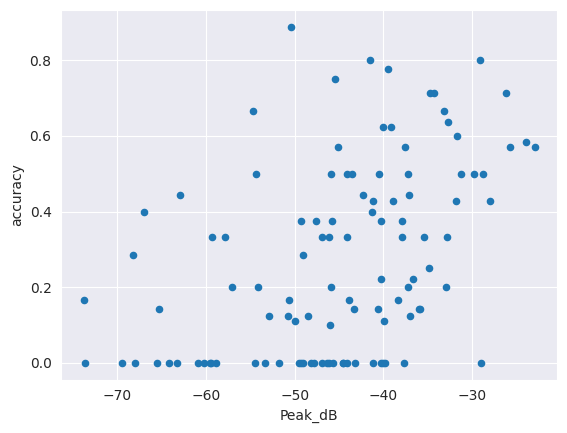

In [224]:
filtered_merged_df_distress_pain = filtered_merged_df[filtered_merged_df["emotion_id"] == 17]
filtered_merged_df_distress_pain.plot.scatter(x='Peak_dB', y='accuracy')

#### triumph/achievement

<Axes: xlabel='Peak_dB', ylabel='accuracy'>

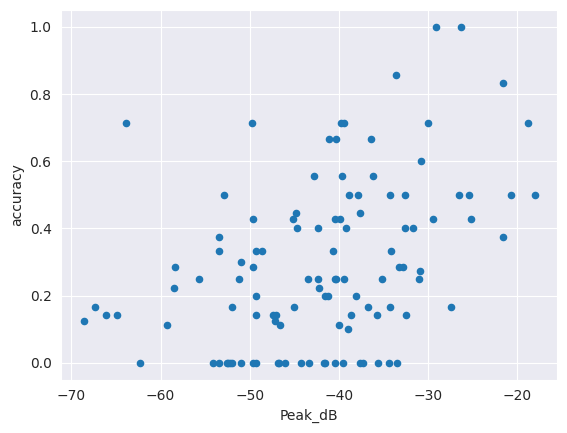

In [225]:
filtered_merged_df_triumph_achievement = filtered_merged_df[filtered_merged_df["emotion_id"] == 20]
filtered_merged_df_triumph_achievement.plot.scatter(x='Peak_dB', y='accuracy')

#### anger

<Axes: xlabel='Peak_dB', ylabel='accuracy'>

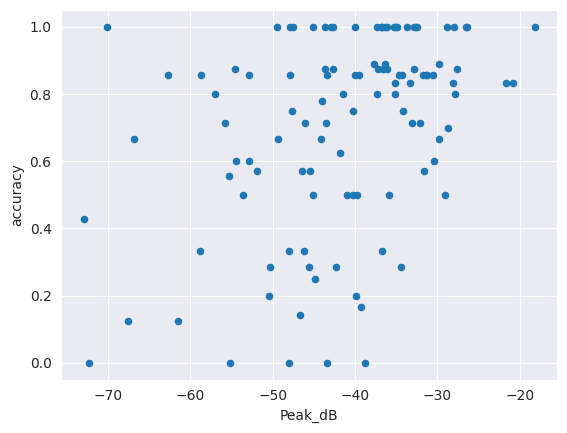

In [226]:
filtered_merged_df_anger = filtered_merged_df[filtered_merged_df["emotion_id"] == 12]
filtered_merged_df_anger.plot.scatter(x='Peak_dB', y='accuracy')

## Mode analysis

In [227]:
# Get unique emotion_ids
unique_modes = filtered_merged_df['mode'].unique()

# Initialize a dictionary to store results
correlation_results = {}

# Loop through each unique emotion_id to perform correlation analysis
for mode in unique_modes:
    # Filter the DataFrame for the current emotion_id
    df_filtered = filtered_merged_df[filtered_merged_df['mode'] == mode]
    
    # Perform Pearson correlation only if there are enough data points
    if len(df_filtered) > 1:
        corr_coefficient, p_value = pearsonr(df_filtered['accuracy'], df_filtered['Peak_dB'])
        
        # Store the results
        correlation_results[mode] = {'Correlation Coefficient': corr_coefficient, 'P-value': p_value}
    else:
        correlation_results[mode] = {'Correlation Coefficient': None, 'P-value': None}

# Print the results
for mode, results in correlation_results.items():
    corr = results['Correlation Coefficient']
    pval = results['P-value']
    
    if corr is not None and pval is not None:
        print(f"Mode {mode} Correlation Coefficient = {corr:.3f}, P-value = {pval:.3g}")
    else:
        print(f"Mode {mode}: Not enough data for correlation analysis")


Mode p Correlation Coefficient = 0.117, P-value = 5.36e-09
Mode v Correlation Coefficient = 0.158, P-value = 2.78e-15
